In [ ]:
from dgl.data import citation_graph,CoraDataset,TUDataset,GINDataset, ICEWS18
import torch
from torch import nn
from dgl import DGLGraph
import numpy as np
import dgl
from datasets.prepocessing import one_class_processing

In [120]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
torch.cuda.is_available()

In [2]:
import numpy as np
x=np.arange(10)
y=np.sin(x)

In [92]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 0, 9])

In [91]:
x[8]=0

In [115]:
results_dom=np.load('Dom3.npz')
results_sage=np.load('SAGE.npz')

In [97]:
results_sage2=np.load('SAGE-2.npz')

In [63]:
results_dom1=np.load('Dom2.npz')

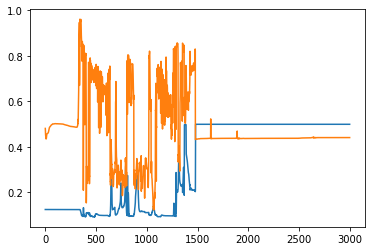

In [116]:
plt.plot(results_dom['loss'][:3000])
plt.plot(results_dom['valauc'][:3000])

In [86]:
results_sage['loss'][200:].max()

0.005024249665439129

In [78]:
np.where(results_sage['loss']==results_sage['loss'][200:].max())

(array([4928]),)

In [94]:
a=results_sage['loss']

In [95]:
a[4928]=0.02
a[4928]

0.02

In [96]:
results_sage['loss'][4928]

0.005024249665439129

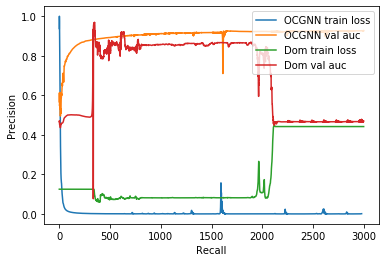

In [126]:
plt.plot(results_sage2['loss'][20:3000]/results_sage2['loss'][20:3000].max(),label='OCGNN train loss')
plt.plot(results_sage2['valauc'][:3000],label='OCGNN val auc')
plt.plot(results_dom1['loss'][:3000],label='Dom train loss')
plt.plot(results_dom1['valauc'][:3000],label='Dom val auc')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
#plt.title('2-class Precision-Recall curve')
plt.savefig('PRC',dpi=600)
plt.show()

In [125]:
plt.legend?

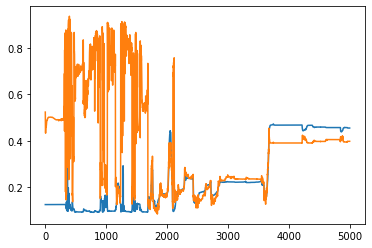

In [41]:
plt.plot(results_dom['loss'])
plt.plot(results_dom['valauc'])
#plt.plot(npzfile['testauc'])

In [ ]:
data =citation_graph.load_cora()
#data =citation_graph.load_citeseer()
#data =TUDataset('PROTEINS_full')
#data =ICEWS18('train')
data

In [ ]:
data.train_mask.astype('bool')

In [ ]:
data.features[data.train_mask.astype('bool')].shape

In [ ]:
g = data.graph
g = DGLGraph(g)
g

In [ ]:
adj=g.adjacency_matrix().to_dense()

In [ ]:
data.train_mask.shape

In [ ]:
data.feat

In [ ]:
adj[data.train_mask.astype('bool')].size()

In [ ]:
def pre_process(args,dataset):

    for i in range(len(dataset)):
        print(i)
        #dataset.graph_lists[i].ndata
        normal_idx=torch.where(dataset.graph_lists[i].ndata['node_labels']==0)[0]
        abnormal_idx=torch.where(dataset.graph_lists[i].ndata['node_labels']!=0)[0]
        dataset.graph_lists[i].ndata['node_labels'][normal_idx]=0
        dataset.graph_lists[i].ndata['node_labels'][abnormal_idx]=1
        
        g=dgl.transform.add_self_loop(dataset.graph_lists[i])
        g.ndata.update(dataset.graph_lists[i].ndata)
        dataset.graph_lists[i]=g
        print(dataset.graph_lists[i].ndata['node_labels'].max())
        #print(dataset.graph_lists[i])
    return dataset

In [ ]:
from dgl.data import tu
dataset = tu.TUDataset(name='ENZYMES')
print(len(dataset))
train_size = int(0.6 * len(dataset))
test_size = int(0.2 * len(dataset))
val_size = int(len(dataset) - train_size - test_size)
dataset = pre_process(None,dataset)
dataset_train, dataset_val, dataset_test = torch.utils.data.random_split(
    dataset, (train_size, val_size, test_size))

In [ ]:
a=batch_graph.ndata['node_attr']

In [ ]:
a=batch_graph.adjacency_matrix()

In [ ]:
scores=F.mse_loss(a, a, reduction='none')
scores=torch.mean(scores,1)

In [ ]:
scores.size()

In [ ]:
normlizing = nn.BatchNorm1d(batch_graph.ndata['node_attr'].shape[1], affine=False)
normlizing

In [ ]:
def batching_graph(batch):
    '''
    for dataset batching
    transform ndata to tensor (in gpu is available)
    '''
    graphs, labels = map(list, zip(*batch))
    #cuda = torch.cuda.is_available()

    # batch graphs and cast to PyTorch tensor
    for graph in graphs:
        for (key, value) in graph.ndata.items():
            graph.ndata[key] = value.float()
    batched_graphs = dgl.batch(graphs)

    # cast to PyTorch tensor
    batched_labels = torch.LongTensor(np.array(labels))

    return batched_graphs, batched_labels

In [ ]:
train_loader=torch.utils.data.DataLoader(dataset_train,
                                       batch_size=32,
                                       shuffle=True,
                                       collate_fn=batching_graph,
                                       drop_last=True,
                                       num_workers=4)

In [ ]:
for (batch_idx, (batch_graph, graph_labels)) in enumerate(train_loader):
    print(batch_idx)
    if batch_idx >3:
        break

In [ ]:
a=batch_graph.ndata['node_attr']
m = nn.BatchNorm1d(29, affine=False)

In [ ]:
batch_graph.ndata['node_attr'].shape[1]

In [ ]:
a=np.ones(10)
a

In [ ]:
batch_graph.ndata['node_labels'][normal_idx]=0
batch_graph.ndata['node_labels'][abnormal_idx]=1

In [ ]:
batch_graph.ndata['node_labels'].sum()

In [ ]:
input_dim, label_dim, max_num_node = dataset.statistics()

In [ ]:
print(len(dataset_train))
print(len(dataset_val))
print(len(dataset_test))

In [ ]:
label0=data[0][0].ndata['node_labels']
label1=data[1][0].ndata['node_labels']
label2=data[2][0].ndata['node_labels']

In [ ]:
label1

In [ ]:
print(len(label0))
print(len(label1))
print(len(label2))

In [ ]:
data[1][0].ndata['node_labels'].size()

In [ ]:
labels,train_mask,val_mask,test_mask=one_class_processing(data[0][0],4)

In [ ]:
from collections import Counter
Counter(data.labels)

In [ ]:
normal_class=2
labels,train_mask,val_mask,test_mask=one_class_processing(data.labels,normal_class)

In [ ]:
labels[train_mask.astype(int)].shape

In [ ]:
print('train',np.sum(labels[train_mask.astype(int)==1]))
print('val',np.sum(labels[val_mask.astype(int)==1]))
print('test',np.sum(labels[test_mask.astype(int)==1]))

In [ ]:
print('train',np.sum(train_mask))
print('val',np.sum(val_mask))
print('test',np.sum(test_mask))

In [ ]:
train_mask.shape